### Import Library

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import pickle
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns; sns.set(style ='white', color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from warnings import filterwarnings
filterwarnings('ignore')

data_path = 'CollegeBasketballPlayers2009-2021.csv'
total_ball_data = pd.read_csv(data_path, low_memory = False)

In [148]:
total_ball_data["pick"] = total_ball_data["pick"].replace(np.nan, 0)
for i in range(len(total_ball_data)):
    if total_ball_data["pick"][i] >=1:
        total_ball_data["pick"][i]=1
total_ball_data['pick'] = total_ball_data['pick'].astype(int)
ball_data = total_ball_data.loc[total_ball_data['year'] < 2021]
ball_data

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,108.321,108.5270,0.893017,49.964400,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,105.078,104.0170,1.880030,111.929000,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,107.556,102.1540,2.763870,115.021000,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,108.858,106.5560,1.218710,84.169800,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,101.052,100.7240,1.992790,128.028000,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,Mariano Baldon,Niagara,MAAC,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,11-May,30,-0.414715,-34.1733,0.0,2020,72218,all,NaN,NaN,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,0,119.423,114.0410,0.046150,0.088249,-55.565300,-38.138100,-17.427300,-39.908400,1.0000,-22.468800,-17.439600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
56087,Dominique Kennedy,Northwestern St.,Slnd,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,2,2,1.000,1,1,1.000,0,0,0.000,0.0,0.0,200.0,So,1-Jun,12,0.998677,229.2430,0.0,2020,72219,all,NaN,NaN,1.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0,115.350,118.0420,0.064534,0.201875,12.155000,22.404000,-10.249100,45.075600,2.0000,35.683300,9.392350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,Combo G,0.00000
56088,Ja'Mere Redus,Texas Southern,SWAC,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,2,4,0.500,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,Jun-00,11,-0.685731,57.1100,5.7,2020,72220,all,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,106.225,95.4569,0.774465,1.156220,-24.689500,-18.070200,-6.619320,-16.613300,7.0000,-13.372700,-3.240610,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,PF/C,0.00000
56089,Trace Arbuckle,Vanderbilt,SEC,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,1,1,1.000,0.0,0.

In [110]:
# Creates a target object for the pick and calls it y
y = ball_data.pick

# Creates X by using specific statistics
#features = ['Min_per', 'ftr', 'pts', 'ORB_per', 'DRB_per', 'blk_per', 'stl_per', 'dporpag', 'porpag', 'AST_per', 'TO_per', 'FT_per']

X = ball_data.loc[:,ball_data.columns!='pick']
X = X._get_numeric_data()
X=X.dropna(axis=1)
X = X.loc[:,X.columns!='year']

colnames=list(X)
display(X)
#X = ball_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,pid
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,13,39,0.333,0.3,1.5,13.1,0.258086,89.3938,2.5,2
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,20,51,0.392,1.0,1.1,27.4,1.334920,100.0660,3.4,3
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,50,154,0.325,0.0,0.9,21.5,2.274070,104.1070,1.7,5
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,28,62,0.452,0.8,1.9,21.6,0.552857,93.2086,2.0,8
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,0,0,0.000,1.9,1.3,64.8,1.060130,97.8554,3.8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0.000,0.0,0.0,0.0,-0.414715,-34.1733,0.0,72218
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,...,0,0,0.000,0.0,0.0,200.0,0.998677,229.2430,0.0,72219
56088,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,...,0,0,0.000,0.0,0.0,0.0,-0.685731,57.1100,5.7,72220
56089,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,...,1,1,1.000,0.0,0.0,0.0,0.631560,267.3470,0.0,72223


In [161]:
# Specify a Logistic Regression Model
log_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)
#fit our model with our training data
model = log_reg.fit(train_X,train_y)

# Make predictions on validation data and calculate the mean absolute error
val_preds = log_reg.predict(val_X)
val_mae = mean_absolute_error(val_preds, val_y)
print("Validation MAE: {:,.5f}".format(val_mae))

Validation MAE: 0.02646


In [65]:
print(ball_data_2021.pick.isnull().any())
test_preds_2021 = log_reg.predict(test_X_2021)
np.isnan(test_preds_2021).any()

True


False

In [81]:
# Test data, using 2021
ball_data_2021 = total_ball_data.loc[total_ball_data['year'] == 2021]
test_X_2021 = ball_data_2021[colnames]
# Make predictions
test_preds_2021 = log_reg.predict(test_X_2021)

# Find MAE
test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)

print("2021 Test MAE: {:,.5f}".format(test_mae_2021))

# Save predictions in right format
output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': test_preds_2021, 'Actual Pick' : ball_data_2021.pick})
output = output.astype({'Pick':'int'})
output = output.astype({'Actual Pick':'int'})
#output.to_csv('predictions2021.csv', index=False)
output

2021 Test MAE: 0.30161


,Name,Pick,Actual Pick
56091,Troy Holston,0,0
56092,Isaiah Felder,0,0
56093,Thomas Bruce,0,0
56094,Tyler Underwood,0,0
56095,Jalen Coleman-Lands,0,0
...,...,...,...
61056,Trey Patterson,0,0
61057,Stavros Polatoglou,0,0
61058,Sandy Ryan,0,0
61059,Ty Larson,0,0


In [84]:
# Specify a Logistic Regression Model
log_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)
#fit our model with our training data
model = log_reg.fit(train_X,train_y)

In [162]:
pred_test.shape
val_y.dtype
print(np.unique(val_y))
print(np.unique(pred_test))
print(np.unique(val_preds))

[0 1]
[0 1]
[0 1]


The f1 score for the testing data: 0.2918454935622318


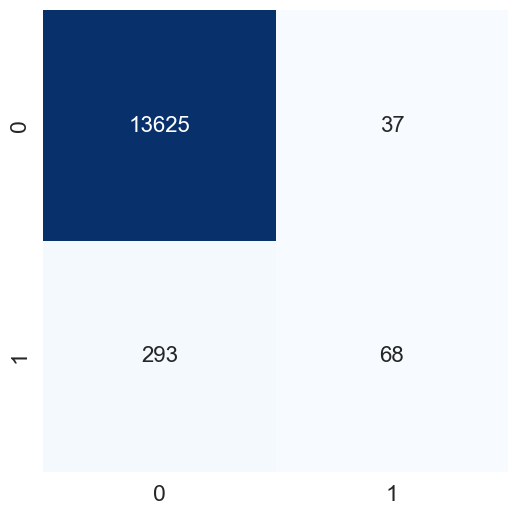

In [115]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(train_X, train_y)

# Predicting on the test data
pred_test = lr.predict(val_X)

#Calculating and printing the f1 score 
f1_test = f1_score(val_y, pred_test)
print('The f1 score for the testing data:', f1_test)

# Function to create a confusion matrix 
def conf_matrix(val_y, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(val_y, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(val_y, pred_test)

The f1 score for the testing data: 0.2572912504994007


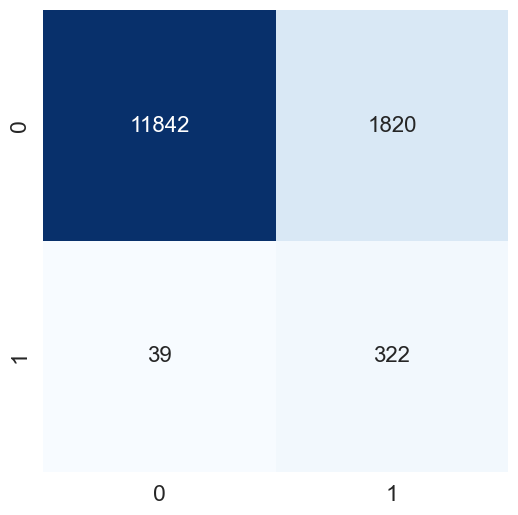

In [135]:
#importing and training the model
model = LogisticRegression(solver='newton-cg', class_weight='balanced')
model.fit(train_X, train_y)

# Predicting on the test data
pred_test = model.predict(val_X)

#Calculating and printing the f1 score 
f1_test = f1_score(val_y, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(val_y, pred_test)

wykres z wagami dla 0 i 1

In [180]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,20)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(train_X, train_y)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


### Import CSV File

In [2]:
college_nba = pd.read_csv('stats/college_noname.csv', index_col = 0)

In [3]:
features = college_nba.drop(['drafted'], axis = 1)

In [13]:
y = college_nba['drafted']

Check importance of features in Logistic Regression Model

    Feature     Score
0       0.0  0.006293
1       1.0  0.003362
2       2.0  0.028659
3       3.0  0.006821
4       4.0  0.013423
5       5.0  0.014656
6       6.0  0.002325
7       7.0  0.005046
8       8.0  0.003604
9       9.0  0.012563
10     10.0 -0.005341
11     11.0 -0.005844
12     12.0  0.000171
13     13.0 -0.006818
14     14.0 -0.009276
15     15.0  0.000131
16     16.0 -0.000903
17     17.0 -0.000739
18     18.0  0.000049
19     19.0  0.000554
20     20.0  0.000810
21     21.0  0.014422
22     22.0 -0.000507
23     23.0  0.024138
24     24.0  0.002473
25     25.0  0.000153


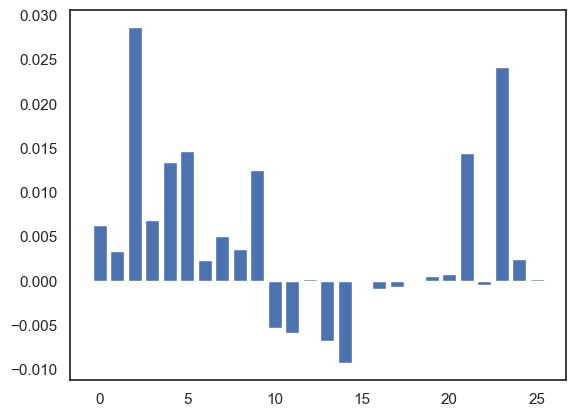

In [120]:
importance = model.coef_[0]
importancedf = pd.DataFrame(columns=['Feature', 'Score'])
# summarize feature importance
for i,v in enumerate(importance):
    importancedf = importancedf.append({'Feature':round(i), 'Score':v}, ignore_index=True)
print(importancedf)
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Choose top 11 features with highest importance

In [123]:
featurelist = list(X)
importancedf['Score'] = importancedf['Score'].abs()
featuresdf = pd.DataFrame({'Feature': importancedf.iloc[:,0], 'Name': featurelist, '|Score|':importancedf.iloc[:,1]})
featuresdf = featuresdf.sort_values(by=['|Score|'], ascending=False)
featuresdf.head(11)

,Feature,Name,|Score|
2,2.0,Ortg,0.028659
23,23.0,adjoe,0.024138
5,5.0,TS_per,0.014656
21,21.0,ftr,0.014422
4,4.0,eFG,0.013423
9,9.0,TO_per,0.012563
14,14.0,twoPA,0.009276
3,3.0,usg,0.006821
13,13.0,twoPM,0.006818
0,0.0,GP,0.006293


## Feature Importance

In [133]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.coef_[0]
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

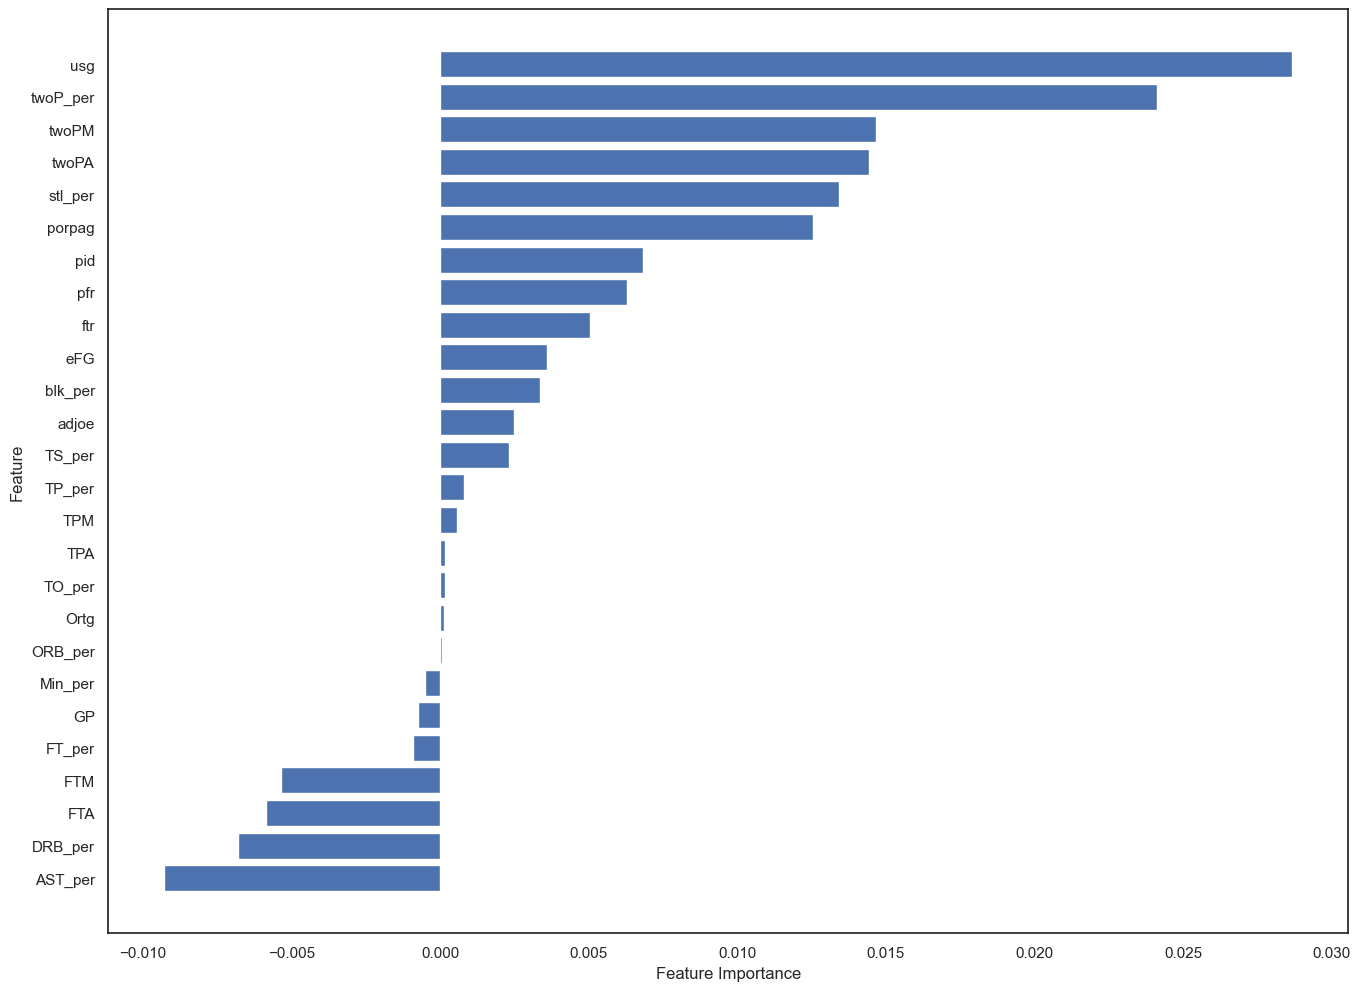

In [134]:
plot_feature_importance(model, train_X)

In [136]:
y = ball_data.pick
for i in [5,7,9,11]:

    sel = SelectFromModel(model, max_features=i)
    sel.fit(train_X, train_y)
    filter1 = sel.get_support()
    selected_feat= train_X.columns[(filter1)]
    print(len(selected_feat))
    print(list(selected_feat))
    #pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

    XX = ball_data[list(selected_feat)]
    train_XX, val_XX, train_y, val_y = train_test_split(XX, y, random_state=1)
    print(train_XX)
    print(train_y)


    # Specify a Random Forest Model
    ball_model = DecisionTreeRegressor(max_leaf_nodes=100, splitter='random', random_state=1, max_features='auto')

    # Fit the model
    ball_model.fit(train_XX, train_y)

    # Make predictions on validation data and calculate the mean absolute error
    val_preds = ball_model.predict(val_XX)
    val_mae = mean_absolute_error(val_preds, val_y)
    print("Validation MAE: {:,.5f}".format(val_mae))


    # Test data, using 2021
    ball_data_2021 = total_ball_data.loc[total_ball_data['year'] == 2021]
    test_X_2021 = ball_data_2021[list(selected_feat)]

    # Make predictions
    test_preds_2021 = ball_model.predict(test_X_2021)

    # Find MAE
    test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)

    # Save predictions in right format
    output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': test_preds_2021, 'Actual Pick' : ball_data_2021.pick})
    #output.to_csv('predictions2021.csv', index=False)
    output = output.astype({'Pick':'int'})
    output = output.astype({'Actual Pick':'int'})
    output

    print("2021 Test MAE: {:,.5f}".format(test_mae_2021))

4
['FT_per', 'twoP_per', 'TP_per', 'porpag']
       FT_per  twoP_per  TP_per    porpag
41900   0.386     0.424   0.000 -0.599182
12452   0.565     0.411   0.000  0.173371
8232    0.747     0.397   0.333  1.372660
38369   0.740     0.481   0.333  0.919834
50277   0.800     0.558   0.500  0.576339
...       ...       ...     ...       ...
50057   1.000     0.333   0.000 -0.035245
32511   0.667     0.366   0.214 -1.111070
5192    0.786     0.538   0.000  0.221107
12172   0.000     0.200   0.000 -0.775629
33003   0.737     0.497   0.337  3.711450

[42068 rows x 4 columns]
41900    0
12452    0
8232     0
38369    0
50277    0
        ..
50057    0
32511    0
5192     0
12172    0
33003    0
Name: pick, Length: 42068, dtype: int32


NameError: name 'DecisionTreeRegressor' is not defined

In [142]:
total_ball_data.pick.isnull().any()

False

In [143]:
ball_data_2021.pick.isnull().any()

True

In [150]:
total_ball_data.loc[total_ball_data['year'] == 2021]

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
56091,Troy Holston,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,0,0,0.000,0,0,0.000,1,3,0.333,0.0,0.0,0.0,Sr,4-Jun,25,0.261536,91.80970,3.5,2021,37479,all,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,106.4190,110.8410,0.655018,3.040990,-6.329190,-2.48656,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,Combo G,6.934360
56092,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,Jun-00,0,-1.110000,57.54910,2.8,2021,39014,all,NaN,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,NaN,0,110.1920,116.0180,0.450228,21.524200,-11.237600,-7.65745,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
56093,Thomas Bruce,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,14,32,0.438,33,59,0.559,0,2,0.000,9.0,1.7,52.5,Sr,9-Jun,32,0.662985,93.67160,5.5,2021,39412,all,NaN,0.500000,26.0,37.0,7.0,22.0,0.7027,0.3182,9.0,10.0,0.9,0,99.2886,105.5980,1.706130,48.262400,-0.796603,-3.88882,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,C,0.576484
56094,Tyler Underwood,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,0,0,0.000,1,2,0.500,1,1,1.000,0.0,0.0,0.0,Sr,2-Jun,32,0.135373,102.32400,5.0,2021,39780,all,NaN,0.000000,0.0,0.0,1.0,2.0,NaN,0.5000,0.0,0.0,NaN,0,100.4870,95.3504,0.253055,2.533010,-1.802590,-1.15052,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,Wing G,3.436420
56095,Jalen Coleman-Lands,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,4-Jun,5,2.977030,111.42600,3.5,2021,40204,all,92.8,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,NaN,0,111.7920,104.3060,2.610670,114.531000,1.064440,2.41992,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,20.3,0.0,Fr,8-Jun,12,-0.117667,62.64930,0.0,2021,74229,all,93.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,65.1939,61.6342,0.341560,1.324650,1.175740,-5.17288,6.348620,18.161500,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.000000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,11-Jun,33,-0.859158,19.23020,0.0,2021,74230,all,NaN,0.000000,0.0,0.0,0.0,1.0,NaN,0.0000,0.0,0.0,NaN,0,119.3690,124.7220,0.032976,1.432110,-11.362500,-7.44880,-3.913670,-12.236100,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.000000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,24,-0.326039,-8.70362,0.0,2021,74231,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,110.6320,108.0530,0.066632,0.098523,-4.939260,-4.48590,-0.453364,-4.651630,1.0000,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.000000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0

In [153]:
y = ball_data.pick
for i in [5,7,9,11]:
    sel = SelectFromModel(model, max_features=i)
    sel.fit(train_X, train_y)
    filter1 = sel.get_support()
    selected_feat= train_X.columns[(filter1)]
    print(len(selected_feat))
    print(list(selected_feat))
    #pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

    XX = ball_data[list(selected_feat)]
    train_XX, val_XX, train_y, val_y = train_test_split(XX, y, random_state=1)
    #print(train_XX)
    #print(train_y)


    # Specify a Logistic Regression Model
    ball_model = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)

    # Fit the model
    ball_model.fit(train_XX, train_y)

    # Make predictions on validation data and calculate the F1 score
    val_preds = ball_model.predict_proba(val_XX)[:, 1]
    val_f1 = f1_score(val_y, np.round(val_preds))
    print("Validation F1 score: {:,.5f}".format(val_f1))


    # Test data, using 2021
    ball_data_2021 = total_ball_data.loc[total_ball_data['year'] == 2021]
    test_X_2021 = ball_data_2021[list(selected_feat)]

    # Make predictions
    test_preds_2021 = ball_model.predict_proba(test_X_2021)[:, 1]

    # Find F1 score
    test_f1_2021 = f1_score(ball_data_2021.pick, np.round(test_preds_2021))

    # Save predictions in right format
    output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': np.round(test_preds_2021), 'Actual Pick' : ball_data_2021.pick})
    #output.to_csv('predictions2021.csv', index=False)
    output = output.astype({'Pick':'int'})
    output = output.astype({'Actual Pick':'int'})
    output

    print("2021 Test F1 score: {:,.5f}".format(test_f1_2021))

4
['FT_per', 'twoP_per', 'TP_per', 'porpag']
Validation F1 score: 0.24172
2021 Test F1 score: 0.20690
4
['FT_per', 'twoP_per', 'TP_per', 'porpag']
Validation F1 score: 0.24172
2021 Test F1 score: 0.20690
4
['FT_per', 'twoP_per', 'TP_per', 'porpag']
Validation F1 score: 0.24172
2021 Test F1 score: 0.20690
4
['FT_per', 'twoP_per', 'TP_per', 'porpag']
Validation F1 score: 0.24172
2021 Test F1 score: 0.20690


### Confusion Matrix Function Plot

In [173]:
labels = ['Not Drafted', 'Drafted']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [158]:
val_preds.isu

array([0. , 0.2, 0. , ..., 0. , 0. , 0. ])

Predicted    0    1  All
True                    
0          584   64  648
1          112  231  343
All        696  295  991


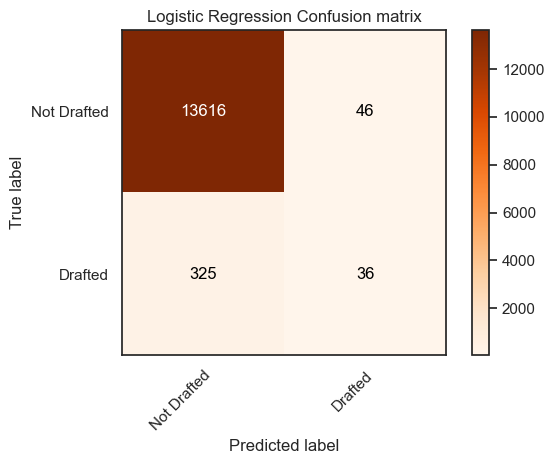

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13662
           1       0.44      0.10      0.16       361

    accuracy                           0.97     14023
   macro avg       0.71      0.55      0.57     14023
weighted avg       0.96      0.97      0.97     14023



In [174]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(val_y, val_preds, classes=labels,
                      title='Logistic Regression Confusion matrix')

plt.show()

print(classification_report(val_y, val_preds))

### Cross Validation 

In [164]:
log_cv_score = cross_val_score(log_reg, train_X, train_y, cv=3)
mean_log_cv_score = np.mean(log_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_log_cv_score * 100))

Mean Cross Validation Score: 97.54%


In [165]:
#how well did our model predict our correct class? 
accuracy_score(val_y, val_preds)

0.9735434643086358

### Grid Search for Logistic Regression

In [23]:
lg_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)
lg_param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,45]}

In [166]:
log_grid_search = GridSearchCV(lg_reg, lg_param_grid, cv=3, return_train_score=True)
print(log_grid_search.fit(train_X,train_y))

GridSearchCV(cv=3,
             estimator=LogisticRegression(C=1e+16, fit_intercept=False,
                                          random_state=2),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25, 45],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)


In [171]:
log_grid_search.cv_results_

{'mean_fit_time': array([0. , 0.6, 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0.6, 0. , 0.6, 0. ,
        0.7, 0. , 0.6, 0. , 0.6]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 'param_C': masked_array(data=[0.001, 0.001, 0.009, 0.009, 0.01, 0.01, 0.09, 0.09, 1,
                    1, 5, 5, 10, 10, 25, 25, 45, 45],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
       

In [169]:
log_gs_training_score = np.mean(log_grid_search.cv_results_['mean_train_score'])
print(log_gs_training_score, 'training')
log_gs_testing_score = log_grid_search.score(train_X, train_y)

#Predict values based on new parameters
y_pred_acc = log_grid_search.predict(val_X)

# New Model Evaluation metrics 
print("Mean Training Score:", log_gs_training_score*100)
print("Mean Testing Score:", log_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(val_y,y_pred_acc)))
print('Precision Score : ' + str(precision_score(val_y,y_pred_acc)))
print('Recall Score : ' + str(recall_score(val_y,y_pred_acc)))
print('F1 Score : ' + str(f1_score(val_y,y_pred_acc)))
print("Best Parameter Found:")
log_grid_search.best_params_

nan training
Mean Training Score: nan
Mean Testing Score: 97.45412189787962
Accuracy Score : 0.9728303501390573
Precision Score : 0.421875
Recall Score : 0.14958448753462603
F1 Score : 0.22085889570552147
Best Parameter Found:


{'C': 0.001, 'penalty': 'l2'}

### Grid Search Confusion Matrix

Predicted    0    1  All
True                    
0          584   64  648
1          112  231  343
All        696  295  991


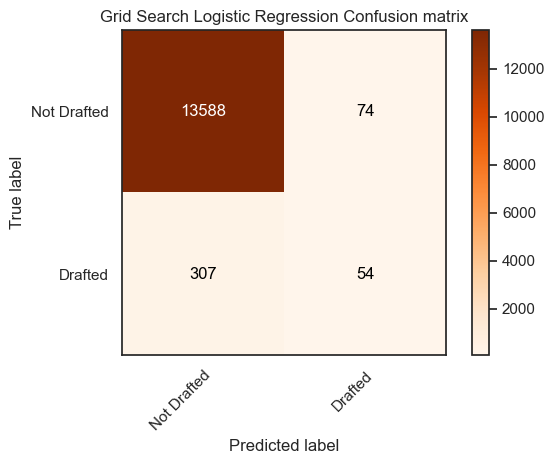

In [175]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(val_y, y_pred_acc, classes=labels,
                      title='Grid Search Logistic Regression Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

### ROC AUC GRAPH

In [176]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear') #Starter code
model_log = logreg.fit(train_X, train_y.values.ravel())
print(model_log)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


In [177]:
# Your code here
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(val_X)

fpr, tpr, thresholds = roc_curve(val_y, y_score)

y_train_score = model_log.decision_function(train_X)
train_fpr, train_tpr, thresholds = roc_curve(train_y, y_train_score)

AUC: 0.9314624341039113


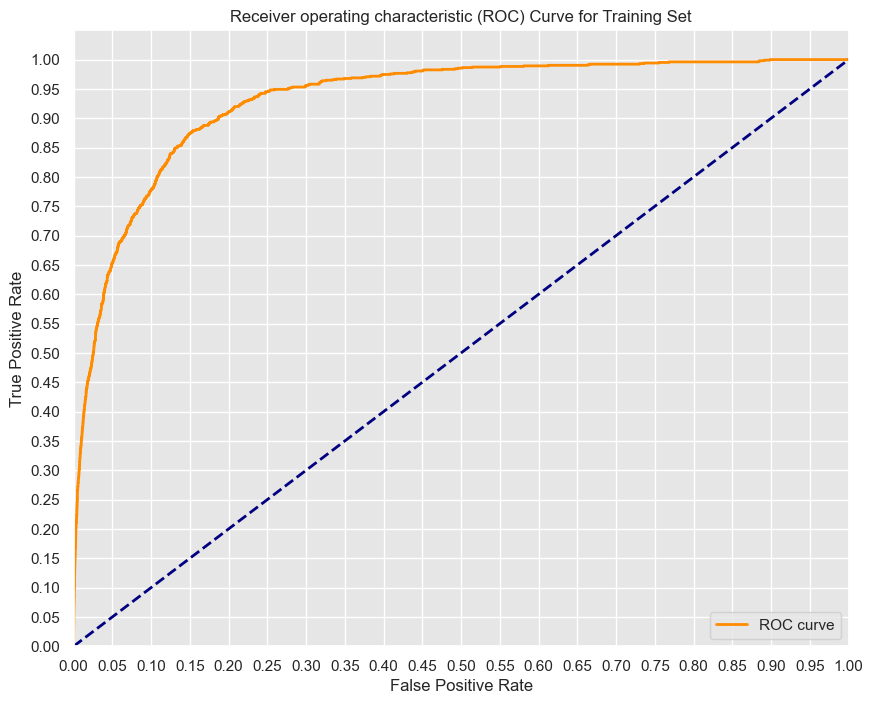

In [178]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

AUC: 0.9262065433328832


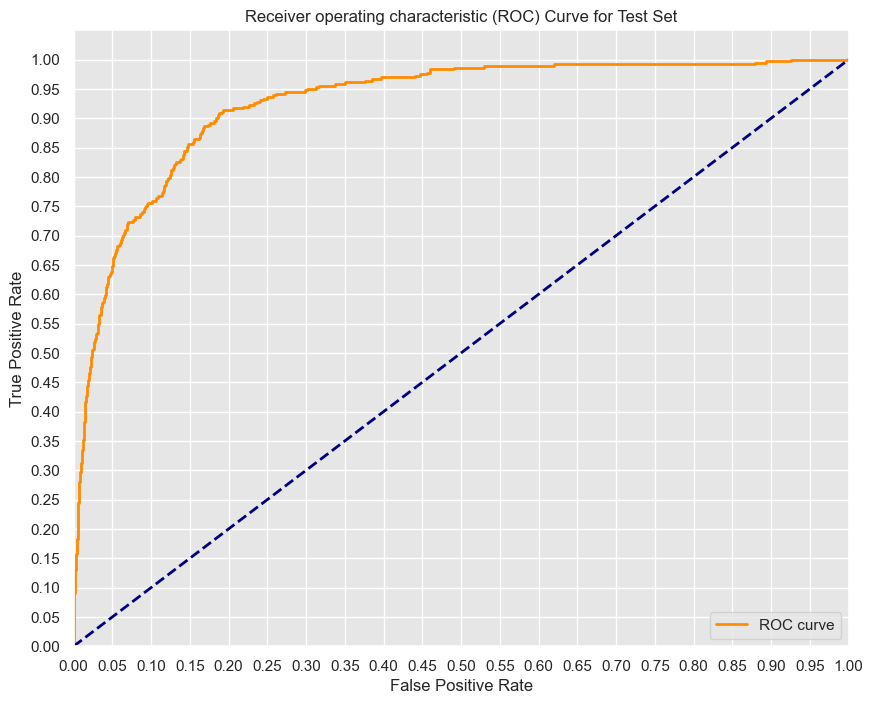

In [179]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()